In [1]:
#Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
# ALgorithm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Functions for evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv("heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
new_df=df.dropna(axis=0, how='any').copy()
new_df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.540305,240.581699,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,17.989941,53.982967,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,80.000000,85.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,214.000000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [4]:
print('Age',new_df['Age'].unique())
print('Sex',new_df['Sex'].unique())
print('ChestPainType',new_df['ChestPainType'].unique())
print('RestingBP',new_df['RestingBP'].unique())
print('Cholesterol',new_df['Cholesterol'].unique())
print('FastingBS',new_df['FastingBS'].unique())
print('RestingECG',new_df['RestingECG'].unique())
print('MaxHR',new_df['MaxHR'].unique())
print('ExerciseAngina',new_df['ExerciseAngina'].unique())
print('Oldpeak',new_df['Oldpeak'].unique())
print('ST_Slope',new_df['ST_Slope'].unique())
print('HeartDisease',new_df['HeartDisease'].unique())

Age [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingBP [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116 144 154 134 104 139 131 141 178 146 158 123 102  96 143
 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251

In [5]:
df_mapping=new_df.copy()

map_Sex={'M':0, 'F':1}
map_ChestPainType={'ATA':0, 'NAP':1, 'ASY':2, 'TA':3}
map_RestingECG={'Normal':0, 'ST':1, 'LVH':2}
map_ExerciseAngina={'N':0, 'Y':1}
map_ST_Slope={'Up':0, 'Flat':1, 'Down':1}

df_mapping['Sex']=df_mapping['Sex'].map(map_Sex)
df_mapping['ChestPainType']=df_mapping['ChestPainType'].map(map_ChestPainType)
df_mapping['RestingECG']=df_mapping['RestingECG'].map(map_RestingECG)
df_mapping['ExerciseAngina']=df_mapping['ExerciseAngina'].map(map_ExerciseAngina)
df_mapping['ST_Slope']=df_mapping['ST_Slope'].map(map_ST_Slope)
df_mapping.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [6]:
dummied_new_df=pd.get_dummies(new_df, columns=['Sex', 'ChestPainType', 'RestingECG',
                                               'ExerciseAngina', 'ST_Slope'])
dummied_new_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [7]:
x=dummied_new_df.drop(['HeartDisease'],axis=1).copy()
y=df['HeartDisease'].copy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [8]:
from itertools import product
from sklearn.model_selection import KFold, StratifiedKFold

cv_outer = KFold(n_splits=3, random_state=0,shuffle=True)
combination = {'n_neighbors': [3,5,6] , 
               'algorithm': ['auto','ball_tree','kd_tree'] ,
              }

combination_outcome=[dict(zip(combination, v)) for v in product(*combination.values())]
print("共有",len(combination_outcome),"個組合\n")


for train_idx, val_idx in (cv_outer.split(x_train, y_train)):
    train_data, val_data = x_train.iloc[train_idx], x_train.iloc[val_idx]
    train_target, val_target = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    model = KNeighborsClassifier()
    cv_inner = KFold(n_splits=3, random_state=10,shuffle=True)


for index,combn_outcome in enumerate(combination_outcome):
    
    model=KNeighborsClassifier(n_neighbors=combn_outcome["n_neighbors"],
                               algorithm=combn_outcome["algorithm"])
    
    model.fit(train_data, train_target)
    nested_KNN_ACC=abs(cross_val_score(model,train_data,train_target,cv=cv_inner,scoring='accuracy'))

    
    print("index:",index)
    print ('n_neighbors = {} \nalgorithm= {} \n'.format(
        combn_outcome["n_neighbors"],
        combn_outcome["algorithm"]
        )
      )
    print('Training result')
    print("3 times validation:",nested_KNN_ACC)
    print('Average RMSE:',round(np.mean(nested_KNN_ACC),2),'+/-',round((np.std(nested_KNN_ACC)),2))
    print('+------------------------------------+')
    Average_ACC_list = []
    Average_ACC_mean=[round((np.mean(nested_KNN_ACC)),2)] 
    Average_ACC_std=[round((np.std(nested_KNN_ACC)),2)]
    Average_ACC=[(Average_ACC_mean,Average_ACC_std)]
    for i in Average_ACC:
        Average_ACC_list+=[i]
    
print('+------------------------------------+')        
print("Outcome")
print("Best Average ACC:",min(Average_ACC_list))
best=combination_outcome[Average_ACC_list.index(min(Average_ACC_list))]
best_index=Average_ACC_list.index(min(Average_ACC_list))
print("index:",best_index)
print("Hyper-parameter:",best)

共有 9 個組合

index: 0
n_neighbors = 3 
algorithm= auto 

Training result
3 times validation: [0.6402439  0.71165644 0.60122699]
Average RMSE: 0.65 +/- 0.05
+------------------------------------+
index: 1
n_neighbors = 3 
algorithm= ball_tree 

Training result
3 times validation: [0.6402439  0.71165644 0.60122699]
Average RMSE: 0.65 +/- 0.05
+------------------------------------+
index: 2
n_neighbors = 3 
algorithm= kd_tree 

Training result
3 times validation: [0.6402439  0.71165644 0.60122699]
Average RMSE: 0.65 +/- 0.05
+------------------------------------+
index: 3
n_neighbors = 5 
algorithm= auto 

Training result
3 times validation: [0.6402439  0.6993865  0.68711656]
Average RMSE: 0.68 +/- 0.03
+------------------------------------+
index: 4
n_neighbors = 5 
algorithm= ball_tree 

Training result
3 times validation: [0.6402439  0.6993865  0.68711656]
Average RMSE: 0.68 +/- 0.03
+------------------------------------+
index: 5
n_neighbors = 5 
algorithm= kd_tree 

Training result
3 ti

Training result: 
Training ACC: 77.38
Training f1s: 79.9
Training pre: 77.65
Training sen: 82.29
Training spe: 71.47

Training confusion matrix:


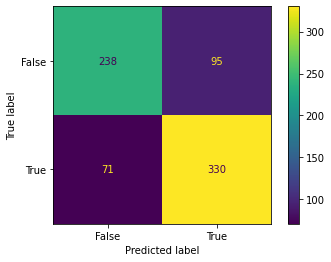

+--------------------------------------+
Testing result:
Testing ACC: 61.96
Testing f1s: 67.29
Testing pre: 67.29
Testing sen: 67.29
Testing spe: 54.55

Testing confusion matrix:


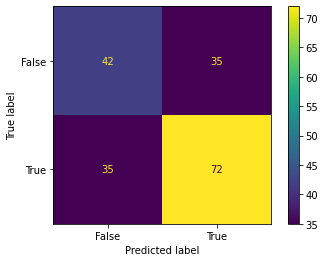

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
model_KNC=KNeighborsClassifier(n_neighbors=5,algorithm='kd_tree')
model_KNC.fit(x_train,y_train)

training_prediction=model_KNC.predict(x_train)
# Accuracy
training_acc=accuracy_score(y_train,training_prediction)
# f1 score
training_f1s=f1_score(y_train,training_prediction,pos_label=1)
# precision
training_pre=precision_score(y_train,training_prediction,pos_label=1)
#sensitivity
training_sen=recall_score(y_train,training_prediction,pos_label=1)
#specificity
training_spe=recall_score(y_train,training_prediction,pos_label=0)
#confusion matrix
training_cm=confusion_matrix(y_train,training_prediction)
training_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = training_cm, display_labels = [False, True])
# Testing result
testing_prediction=model_KNC.predict(x_test)
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1)
testing_sen=recall_score(y_test,testing_prediction,pos_label=1)
testing_spe=recall_score(y_test,testing_prediction,pos_label=0)
testing_cm=confusion_matrix(y_test,testing_prediction)
testing_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = testing_cm, display_labels = [False, True])

# print result
print('Training result: ')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
training_cm_display.plot()
plt.show()
print('+--------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
testing_cm_display.plot()
plt.show()

In [11]:
prediction=model_KNC.predict(x_train)
proba=model_KNC.predict_proba(x_train)[:, 1]
auc_value = roc_auc_score(y_train,proba)
print('AUC:',round(auc_value,2))

AUC: 0.86


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


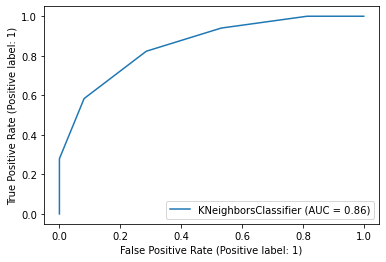

In [12]:
roc_fig=plot_roc_curve(model_KNC, x_train,y_train)

In [13]:
prediction=model_KNC.predict(x_train)
proba=model_KNC.predict_proba(x_test)[:, 1]
auc_value = roc_auc_score(y_test,proba)
print('AUC:',round(auc_value,2))

AUC: 0.64


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


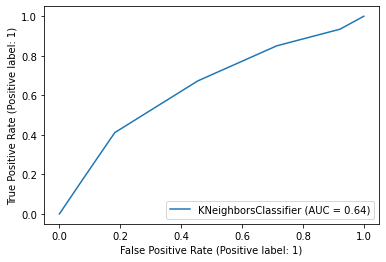

In [14]:
roc_fig=plot_roc_curve(model_KNC, x_test,y_test)